In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import preprocessing,model_selection
import itertools
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from pandas import Series, DataFrame
from collections import Counter, defaultdict

In [2]:
data = pd.read_csv('cs-training.csv')
print("Shape for dataset is {}".format(data.shape))

Shape for dataset is (150000, 12)


In [3]:
print("Info for dataset")
data.info()

Info for dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [4]:
col_names = data.columns.values
col_names[0] = 'ID' ## rename first column to ID
data.columns = col_names ## assign new column name to training dataset
# удаляем переменную ID
data.drop('ID', axis=1, inplace=True)

In [5]:
data.head(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [7]:
# разбиваем данные на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(data.drop('SeriousDlqin2yrs', axis=1), \
                                                data['SeriousDlqin2yrs'], test_size=.3, \
                                                stratify=data['SeriousDlqin2yrs'], random_state=100)
X_train.head(10)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
49898,0.719619,78,0,0.851277,3993.0,19,0,2,0,0.0
73629,0.470176,49,0,0.525397,8937.0,24,0,2,0,0.0
142688,0.140701,69,0,233.000000,NaN,10,0,0,0,0.0
112088,0.055935,51,0,837.000000,NaN,7,0,1,0,0.0
34526,0.009316,83,0,0.002940,5101.0,7,0,0,0,0.0
75695,0.020310,57,0,0.365728,14600.0,6,0,2,0,0.0
124944,0.000502,38,0,0.173270,3583.0,10,0,0,0,0.0
79452,0.665133,47,4,0.324540,8377.0,5,0,1,0,1.0
54915,0.114428,40,0,510.000000,NaN,3,0,0,0,0.0
49828,0.107926,57,1,0.363651,12566.0,14,0,2,0,2.0


In [8]:
cat_columns = X_train.dtypes[X_train.dtypes == 'object'].index
num_columns = X_train.dtypes[X_train.dtypes != 'object'].index

In [9]:
for i in num_columns:
    X_train[i].fillna(X_train[i].mean(), inplace = True)
    X_test[i].fillna(X_test[i].mean(), inplace= True)

In [10]:
for i in cat_columns:
    X_train[i].fillna(X_train[i].value_counts().index[0], inplace = True)
    X_test[i].fillna(X_test[i].value_counts().index[0], inplace = True)

In [11]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [12]:
feat_labels = X_train.columns
feat_labels

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [13]:
dtrain = xgb.DMatrix(data = X_train, label = y_train, feature_names = feat_labels)
dtest = xgb.DMatrix(data = X_test, label = y_test)

C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [14]:
params = {'objective': 'binary:logistic',
          'eta': 0.06,
          'max_depth': 4,
          'seed': 42,
          'eval_metric': 'auc','silent': 1}
num_rounds = 100

In [15]:
evallist = [(dtrain, 'train'), (dtest, 'test')]

In [16]:
xgb_model = xgb.train(params, dtrain, num_rounds, evallist)

[0]	train-auc:0.829321	test-auc:0.831194
[1]	train-auc:0.830604	test-auc:0.8328
[2]	train-auc:0.836002	test-auc:0.837312
[3]	train-auc:0.836378	test-auc:0.837552
[4]	train-auc:0.836443	test-auc:0.837627
[5]	train-auc:0.844363	test-auc:0.844601
[6]	train-auc:0.844454	test-auc:0.84468
[7]	train-auc:0.844565	test-auc:0.844774
[8]	train-auc:0.844597	test-auc:0.844781
[9]	train-auc:0.844746	test-auc:0.844872
[10]	train-auc:0.844727	test-auc:0.844876
[11]	train-auc:0.848559	test-auc:0.846657
[12]	train-auc:0.848577	test-auc:0.846674
[13]	train-auc:0.848601	test-auc:0.846672
[14]	train-auc:0.848628	test-auc:0.846727
[15]	train-auc:0.848656	test-auc:0.846738
[16]	train-auc:0.849053	test-auc:0.847209
[17]	train-auc:0.849705	test-auc:0.847625
[18]	train-auc:0.8506	test-auc:0.848523
[19]	train-auc:0.850612	test-auc:0.848568
[20]	train-auc:0.85056	test-auc:0.848492
[21]	train-auc:0.850567	test-auc:0.848406
[22]	train-auc:0.850817	test-auc:0.848531
[23]	train-auc:0.851171	test-auc:0.848935
[24]	tra

In [17]:
preds_prob = xgb_model.predict(dtest)

In [18]:
print('AUC on test dataset: {:.3f}'.format(roc_auc_score(y_test, preds_prob)))

AUC on test dataset: 0.862


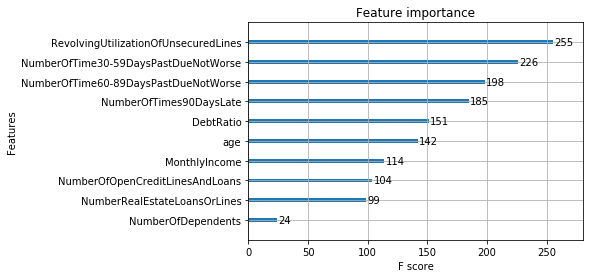

In [19]:
xgb.plot_importance(xgb_model, 
                    importance_type= 'weight')

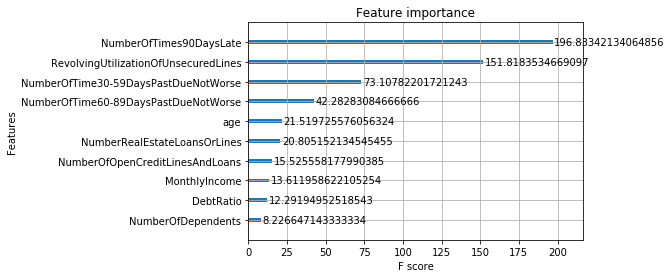

In [20]:
# строим график важностей, тип важности - усредненный выигрыш
xgb.plot_importance(xgb_model, importance_type='gain')

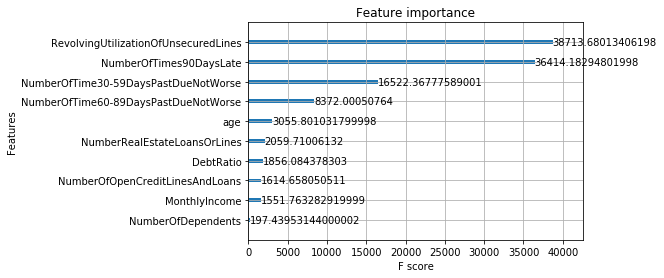

In [21]:
# строим график важностей, тип важности - общий выигрыш
xgb.plot_importance(xgb_model, importance_type='total_gain')

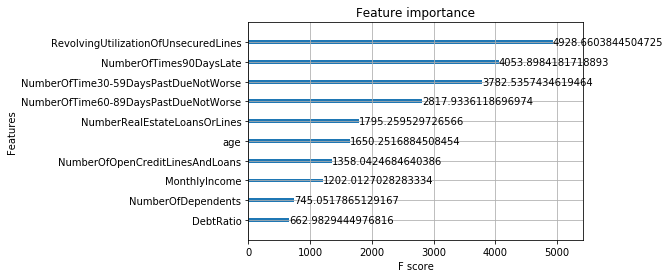

In [22]:
# строим график важностей, тип важности - усредненный охват
xgb.plot_importance(xgb_model, importance_type='cover')

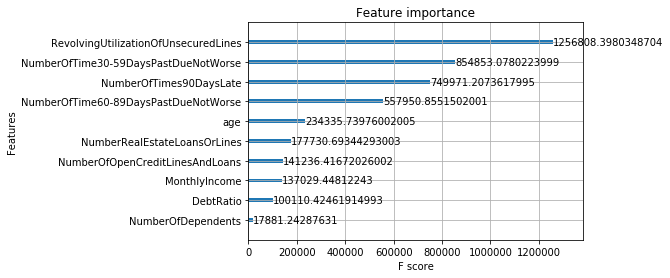

In [23]:
# строим график важностей, тип важности - общий охват
xgb.plot_importance(xgb_model, importance_type='total_cover')

In [24]:
# use scikit-learn

In [25]:
xgb_model_sklearn = xgb.XGBClassifier (eta = 0.05,
                                      n_estimators=1200,
                                      max_depth=4,
                                      objective='binary:logistic',
                                      random_state=42)

In [26]:
xgb_model_sklearn.fit(X_train, y_train)
print('AUC on train set: {:.3f}'.format(roc_auc_score(y_train, 
                                                      xgb_model_sklearn.predict_proba(X_train)[:, 1])))
print('AUC on test set: {:.3f}'.format(roc_auc_score(y_test,
                                                    xgb_model_sklearn.predict_proba(X_test)[:, 1])))

AUC on train set: 0.922
AUC on test set: 0.855


In [27]:
# test values for output metrics
eval_set = [(X_test, y_test)]

In [28]:
xgb_model_sklearn.fit(X_train,
                     y_train,
                     eval_metric=['auc', 'logloss'],
                     eval_set= eval_set,
                     verbose=True)

[0]	validation_0-auc:0.831194	validation_0-logloss:0.617426
[1]	validation_0-auc:0.834908	validation_0-logloss:0.555374
[2]	validation_0-auc:0.837826	validation_0-logloss:0.504028
[3]	validation_0-auc:0.837568	validation_0-logloss:0.460308
[4]	validation_0-auc:0.837848	validation_0-logloss:0.423712
[5]	validation_0-auc:0.84573	validation_0-logloss:0.392251
[6]	validation_0-auc:0.84577	validation_0-logloss:0.365332
[7]	validation_0-auc:0.846682	validation_0-logloss:0.341871
[8]	validation_0-auc:0.846676	validation_0-logloss:0.321633
[9]	validation_0-auc:0.847182	validation_0-logloss:0.303968
[10]	validation_0-auc:0.847617	validation_0-logloss:0.288614
[11]	validation_0-auc:0.848658	validation_0-logloss:0.275274
[12]	validation_0-auc:0.848436	validation_0-logloss:0.263535
[13]	validation_0-auc:0.848574	validation_0-logloss:0.253267
[14]	validation_0-auc:0.848668	validation_0-logloss:0.244288
[15]	validation_0-auc:0.849207	validation_0-logloss:0.236405
[16]	validation_0-auc:0.850589	valid

[135]	validation_0-auc:0.864622	validation_0-logloss:0.177597
[136]	validation_0-auc:0.864583	validation_0-logloss:0.177618
[137]	validation_0-auc:0.864581	validation_0-logloss:0.177621
[138]	validation_0-auc:0.864522	validation_0-logloss:0.177648
[139]	validation_0-auc:0.864496	validation_0-logloss:0.177654
[140]	validation_0-auc:0.864514	validation_0-logloss:0.177651
[141]	validation_0-auc:0.864556	validation_0-logloss:0.177649
[142]	validation_0-auc:0.86456	validation_0-logloss:0.177649
[143]	validation_0-auc:0.864543	validation_0-logloss:0.177656
[144]	validation_0-auc:0.864521	validation_0-logloss:0.177658
[145]	validation_0-auc:0.864497	validation_0-logloss:0.177672
[146]	validation_0-auc:0.864493	validation_0-logloss:0.177676
[147]	validation_0-auc:0.864492	validation_0-logloss:0.177678
[148]	validation_0-auc:0.864461	validation_0-logloss:0.17768
[149]	validation_0-auc:0.864439	validation_0-logloss:0.177702
[150]	validation_0-auc:0.864435	validation_0-logloss:0.177705
[151]	vali

[268]	validation_0-auc:0.863575	validation_0-logloss:0.178186
[269]	validation_0-auc:0.863594	validation_0-logloss:0.178182
[270]	validation_0-auc:0.863624	validation_0-logloss:0.17817
[271]	validation_0-auc:0.863598	validation_0-logloss:0.178178
[272]	validation_0-auc:0.863607	validation_0-logloss:0.178169
[273]	validation_0-auc:0.863598	validation_0-logloss:0.178173
[274]	validation_0-auc:0.863583	validation_0-logloss:0.178178
[275]	validation_0-auc:0.863618	validation_0-logloss:0.178167
[276]	validation_0-auc:0.863605	validation_0-logloss:0.178177
[277]	validation_0-auc:0.863618	validation_0-logloss:0.17817
[278]	validation_0-auc:0.86361	validation_0-logloss:0.178173
[279]	validation_0-auc:0.863603	validation_0-logloss:0.178181
[280]	validation_0-auc:0.863633	validation_0-logloss:0.178182
[281]	validation_0-auc:0.863629	validation_0-logloss:0.178189
[282]	validation_0-auc:0.863622	validation_0-logloss:0.178189
[283]	validation_0-auc:0.863607	validation_0-logloss:0.178199
[284]	valid

[401]	validation_0-auc:0.862447	validation_0-logloss:0.178702
[402]	validation_0-auc:0.862431	validation_0-logloss:0.178709
[403]	validation_0-auc:0.862438	validation_0-logloss:0.178704
[404]	validation_0-auc:0.862472	validation_0-logloss:0.178692
[405]	validation_0-auc:0.862456	validation_0-logloss:0.178698
[406]	validation_0-auc:0.862457	validation_0-logloss:0.178701
[407]	validation_0-auc:0.862436	validation_0-logloss:0.178715
[408]	validation_0-auc:0.862483	validation_0-logloss:0.178705
[409]	validation_0-auc:0.862471	validation_0-logloss:0.178723
[410]	validation_0-auc:0.862511	validation_0-logloss:0.178713
[411]	validation_0-auc:0.862428	validation_0-logloss:0.178741
[412]	validation_0-auc:0.862392	validation_0-logloss:0.178745
[413]	validation_0-auc:0.862416	validation_0-logloss:0.178737
[414]	validation_0-auc:0.862416	validation_0-logloss:0.178731
[415]	validation_0-auc:0.862437	validation_0-logloss:0.178722
[416]	validation_0-auc:0.862415	validation_0-logloss:0.178733
[417]	va

[534]	validation_0-auc:0.861469	validation_0-logloss:0.179283
[535]	validation_0-auc:0.861472	validation_0-logloss:0.179282
[536]	validation_0-auc:0.861446	validation_0-logloss:0.179298
[537]	validation_0-auc:0.861404	validation_0-logloss:0.179308
[538]	validation_0-auc:0.86142	validation_0-logloss:0.179308
[539]	validation_0-auc:0.86141	validation_0-logloss:0.179311
[540]	validation_0-auc:0.861383	validation_0-logloss:0.179314
[541]	validation_0-auc:0.86134	validation_0-logloss:0.179326
[542]	validation_0-auc:0.861311	validation_0-logloss:0.179334
[543]	validation_0-auc:0.861313	validation_0-logloss:0.179324
[544]	validation_0-auc:0.861312	validation_0-logloss:0.179325
[545]	validation_0-auc:0.861345	validation_0-logloss:0.179322
[546]	validation_0-auc:0.861307	validation_0-logloss:0.179333
[547]	validation_0-auc:0.861292	validation_0-logloss:0.179344
[548]	validation_0-auc:0.861309	validation_0-logloss:0.179341
[549]	validation_0-auc:0.86134	validation_0-logloss:0.179334
[550]	valida

[667]	validation_0-auc:0.86058	validation_0-logloss:0.179808
[668]	validation_0-auc:0.860579	validation_0-logloss:0.179811
[669]	validation_0-auc:0.860544	validation_0-logloss:0.179827
[670]	validation_0-auc:0.860531	validation_0-logloss:0.179836
[671]	validation_0-auc:0.860523	validation_0-logloss:0.179842
[672]	validation_0-auc:0.860538	validation_0-logloss:0.179829
[673]	validation_0-auc:0.860522	validation_0-logloss:0.179834
[674]	validation_0-auc:0.860533	validation_0-logloss:0.179835
[675]	validation_0-auc:0.860525	validation_0-logloss:0.179843
[676]	validation_0-auc:0.860518	validation_0-logloss:0.179846
[677]	validation_0-auc:0.860511	validation_0-logloss:0.17984
[678]	validation_0-auc:0.860424	validation_0-logloss:0.179895
[679]	validation_0-auc:0.860401	validation_0-logloss:0.179907
[680]	validation_0-auc:0.860414	validation_0-logloss:0.179903
[681]	validation_0-auc:0.860407	validation_0-logloss:0.179905
[682]	validation_0-auc:0.860387	validation_0-logloss:0.179921
[683]	vali

[800]	validation_0-auc:0.85958	validation_0-logloss:0.180526
[801]	validation_0-auc:0.859569	validation_0-logloss:0.18053
[802]	validation_0-auc:0.859578	validation_0-logloss:0.18053
[803]	validation_0-auc:0.859559	validation_0-logloss:0.180542
[804]	validation_0-auc:0.859544	validation_0-logloss:0.180542
[805]	validation_0-auc:0.859551	validation_0-logloss:0.180537
[806]	validation_0-auc:0.859512	validation_0-logloss:0.180547
[807]	validation_0-auc:0.859492	validation_0-logloss:0.180551
[808]	validation_0-auc:0.859463	validation_0-logloss:0.180556
[809]	validation_0-auc:0.859481	validation_0-logloss:0.180552
[810]	validation_0-auc:0.859489	validation_0-logloss:0.180552
[811]	validation_0-auc:0.859484	validation_0-logloss:0.180547
[812]	validation_0-auc:0.859478	validation_0-logloss:0.180549
[813]	validation_0-auc:0.859501	validation_0-logloss:0.180534
[814]	validation_0-auc:0.859502	validation_0-logloss:0.18054
[815]	validation_0-auc:0.859499	validation_0-logloss:0.180542
[816]	valida

[933]	validation_0-auc:0.858669	validation_0-logloss:0.181041
[934]	validation_0-auc:0.858709	validation_0-logloss:0.18103
[935]	validation_0-auc:0.858685	validation_0-logloss:0.181043
[936]	validation_0-auc:0.858592	validation_0-logloss:0.181065
[937]	validation_0-auc:0.858542	validation_0-logloss:0.181081
[938]	validation_0-auc:0.858501	validation_0-logloss:0.181094
[939]	validation_0-auc:0.858464	validation_0-logloss:0.181107
[940]	validation_0-auc:0.858391	validation_0-logloss:0.181127
[941]	validation_0-auc:0.858378	validation_0-logloss:0.181139
[942]	validation_0-auc:0.858379	validation_0-logloss:0.181138
[943]	validation_0-auc:0.858374	validation_0-logloss:0.181133
[944]	validation_0-auc:0.858382	validation_0-logloss:0.181134
[945]	validation_0-auc:0.858371	validation_0-logloss:0.181141
[946]	validation_0-auc:0.858384	validation_0-logloss:0.181141
[947]	validation_0-auc:0.858372	validation_0-logloss:0.181151
[948]	validation_0-auc:0.858372	validation_0-logloss:0.181154
[949]	val

[1065]	validation_0-auc:0.85728	validation_0-logloss:0.181791
[1066]	validation_0-auc:0.857276	validation_0-logloss:0.181793
[1067]	validation_0-auc:0.857282	validation_0-logloss:0.181789
[1068]	validation_0-auc:0.857312	validation_0-logloss:0.181783
[1069]	validation_0-auc:0.857274	validation_0-logloss:0.181803
[1070]	validation_0-auc:0.857279	validation_0-logloss:0.181806
[1071]	validation_0-auc:0.857282	validation_0-logloss:0.181812
[1072]	validation_0-auc:0.857301	validation_0-logloss:0.181811
[1073]	validation_0-auc:0.857302	validation_0-logloss:0.181819
[1074]	validation_0-auc:0.857295	validation_0-logloss:0.181824
[1075]	validation_0-auc:0.85727	validation_0-logloss:0.181837
[1076]	validation_0-auc:0.857267	validation_0-logloss:0.181841
[1077]	validation_0-auc:0.857241	validation_0-logloss:0.181841
[1078]	validation_0-auc:0.857278	validation_0-logloss:0.181827
[1079]	validation_0-auc:0.857267	validation_0-logloss:0.181839
[1080]	validation_0-auc:0.857255	validation_0-logloss:0.1

[1196]	validation_0-auc:0.855501	validation_0-logloss:0.182815
[1197]	validation_0-auc:0.855516	validation_0-logloss:0.182806
[1198]	validation_0-auc:0.855492	validation_0-logloss:0.182809
[1199]	validation_0-auc:0.855493	validation_0-logloss:0.18281


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
# feature importances
for col, score in zip(feat_labels, xgb_model_sklearn.feature_importances_):
    print(col,score)

RevolvingUtilizationOfUnsecuredLines 0.08518272
age 0.026307212
NumberOfTime30-59DaysPastDueNotWorse 0.17541923
DebtRatio 0.024487846
MonthlyIncome 0.022353476
NumberOfOpenCreditLinesAndLoans 0.024692148
NumberOfTimes90DaysLate 0.44879377
NumberRealEstateLoansOrLines 0.036762502
NumberOfTime60-89DaysPastDueNotWorse 0.13367426
NumberOfDependents 0.02232678


In [30]:
# create the list of 
importances = xgb_model_sklearn.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 35,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

 1) NumberOfTimes90DaysLate             0.448794
 2) NumberOfTime30-59DaysPastDueNotWorse 0.175419
 3) NumberOfTime60-89DaysPastDueNotWorse 0.133674
 4) RevolvingUtilizationOfUnsecuredLines 0.085183
 5) NumberRealEstateLoansOrLines        0.036763
 6) age                                 0.026307
 7) NumberOfOpenCreditLinesAndLoans     0.024692
 8) DebtRatio                           0.024488
 9) MonthlyIncome                       0.022353
10) NumberOfDependents                  0.022327


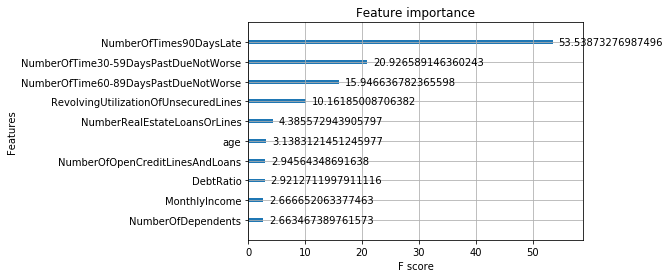

In [31]:
# усредненный выигрыш
xgb.plot_importance(xgb_model_sklearn, importance_type='gain')

In [32]:
xgb_model_sklearn.get_booster().get_score(importance_type='gain')

{'NumberOfTimes90DaysLate': 53.53873276987496,
 'RevolvingUtilizationOfUnsecuredLines': 10.16185008706382,
 'NumberOfTime30-59DaysPastDueNotWorse': 20.926589146360243,
 'NumberOfTime60-89DaysPastDueNotWorse': 15.946636782365598,
 'DebtRatio': 2.9212711997911116,
 'age': 3.1383121451245977,
 'NumberOfOpenCreditLinesAndLoans': 2.94564348691638,
 'MonthlyIncome': 2.666652063377463,
 'NumberRealEstateLoansOrLines': 4.385572943905797,
 'NumberOfDependents': 2.663467389761573}

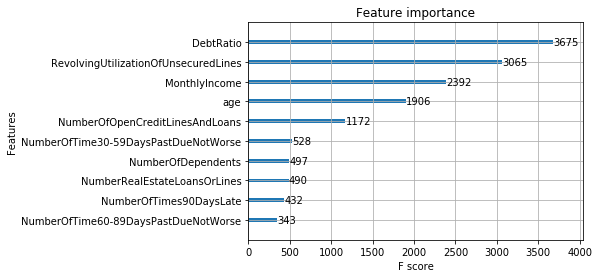

In [33]:
# вычисляем важности по умолчанию
xgb.plot_importance(xgb_model_sklearn)

In [34]:
# записываем значения метрик
results = xgb_model_sklearn.evals_result()
# записываем количество итераций
epochs = len(results['validation_0']['auc'])
# задаем диапазон значений (итераций) для оси x
x_axis = range(0, epochs)

KeyError: 'validation_1'

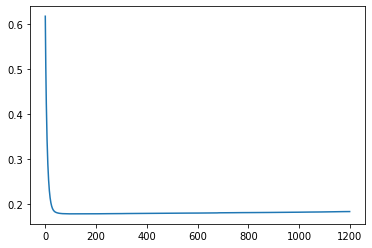

In [35]:
from matplotlib import pyplot
# строим график логистической функции потерь
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Обучающая выборка')
ax.plot(x_axis, results['validation_1']['logloss'], label='Тестовая выборка')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# строим график

In [ ]:
# строим график AUC
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Обучающая выборка')
ax.plot(x_axis, results['validation_1']['auc'], label='Тестовая выборка')
ax.legend()
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()

In [ ]:
# применяем раннюю остановку
xgb_model_sklearn.fit(X_train,
y_train,
early_stopping_rounds=30,
eval_metric='auc',
eval_set=eval_set,
verbose=True)

In [ ]:
# CLASSIFICATION